# Clasificación SVM

Mateo Rosero

## Explicaciones Clave
**Sobre el dataset:** ``mouse_viral_study.csv`` contiene datos para clasificar si un ratón continúa presentando una infección viral (1) o no (0) según dos variables independientes:
- _Med_1_mL_ --> Cantidad de mililitros de la primera medicina administrados al ratón. 
- _Med_2_mL_ --> Cantidad de mililitros de la segunda medicina administrados al ratón. <br>

**Entrenamiento del modelo:** Se utilizará la librería de ``skearn`` para poder implementar el algoritmo de Clasificación SVM.

# Importar Librerías Necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from matplotlib.colors import ListedColormap

# Importar el Dataset

In [2]:
dataset = pd.read_csv('mouse_viral_study.csv') 

# Definición de Variable Independiente y Dependiente

In [3]:
X = dataset[['Med_1_mL', 'Med_2_mL']].values # Extrae las características: volúmenes de medicación
y = dataset['Virus Present'].values # Extrae la variable objetivo: 1 = Infectado, 0 = Saludable

En este dataset, la presencia de infección dentro del ratón está dada según el volúmen administrado de los dos medicamentos. Por esta razón, esta variable cualitativa dicotómica es la variable dependiente y las variables numéricas (mL) son variables independientes.

# División entre Conjunto de Entrenamiento y Conjunto de Prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Conjunto de entrenamiento (X_train):")
print(X_train)
print("Etiquetas de entrenamiento (y_train):")
print(y_train)
print("Conjunto de prueba (X_test):")
print(X_test)
print("Etiquetas de prueba (y_test):")
print(y_test)

Conjunto de entrenamiento (X_train):
[[ 3.32265996  3.84110254]
 [ 7.55130189  8.08712683]
 [ 3.43972709  4.98005447]
 [ 2.33876758  2.99569118]
 [ 3.12991229  4.07373325]
 [ 3.97994026  3.4554647 ]
 [ 3.63389955  3.59673862]
 [ 3.08364358  1.791346  ]
 [ 7.62817612  8.34993362]
 [ 6.79096832  8.30233591]
 [ 6.51776523  7.41399875]
 [ 8.93154148  7.14657325]
 [ 3.54600271  4.26590541]
 [ 2.88106435  1.77164468]
 [ 8.58952784  7.35896888]
 [ 7.94898758  8.52241733]
 [ 4.54930848  2.33187026]
 [ 3.19927535  3.28482262]
 [ 2.86115069  2.77099777]
 [ 3.2189478   4.44196439]
 [ 2.59879465  4.13046598]
 [ 7.78656277  8.11429238]
 [10.          8.87090339]
 [ 8.51855118  7.59138281]
 [ 2.00600683  3.46735456]
 [ 2.65417646  4.77156049]
 [ 9.25072289  7.69539041]
 [ 7.28820878  5.52460651]
 [ 1.          3.12256213]
 [ 6.78256422  9.50630164]
 [ 4.3981722   1.92090935]
 [ 6.3044611   9.52069185]
 [ 2.71705799  1.4062803 ]
 [ 7.06329618  8.10704303]
 [ 5.92077736  2.00304499]
 [ 8.48774871  7.0

# Escalado de Características (Feature Scaling)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Ajuste y transformación para el conjunto de entrenamiento
X_test = sc.transform(X_test)  # Transformación para el conjunto de prueba
print("Conjunto de entrenamiento escalado (X_train):")
print(X_train)
print("Conjunto de prueba escalado (X_test):")
print(X_test)

Conjunto de entrenamiento escalado (X_train):
[[-0.92826751 -0.76765146]
 [ 0.83904796  1.00105673]
 [-0.87934055 -0.29321385]
 [-1.33947476 -1.11981289]
 [-1.00882432 -0.67074767]
 [-0.65356427 -0.92829133]
 [-0.79818827 -0.86944279]
 [-1.02816183 -1.62149046]
 [ 0.87117672  1.11053056]
 [ 0.52127471  1.09070343]
 [ 0.40709241  0.72066099]
 [ 1.41590427  0.60926321]
 [-0.8349238  -0.59069714]
 [-1.11282765 -1.62969717]
 [ 1.27296334  0.69773795]
 [ 1.00525642  1.18237974]
 [-0.41560294 -1.39633167]
 [-0.97983478 -0.99937336]
 [-1.12115035 -1.21341034]
 [-0.97161289 -0.51735866]
 [-1.23079924 -0.64711529]
 [ 0.93737272  1.01237271]
 [ 1.86245503  1.3275438 ]
 [ 1.24329941  0.79455144]
 [-1.47854853 -0.92333853]
 [-1.207653   -0.38006333]
 [ 1.54930271  0.83787646]
 [ 0.72909102 -0.06637726]
 [-1.89899828 -1.06696399]
 [ 0.51776231  1.59222295]
 [-0.47876872 -1.56752003]
 [ 0.31794424  1.59821728]
 [-1.18137234 -1.78189201]
 [ 0.63509122  1.00935295]
 [ 0.15758775 -1.53330591]
 [ 1.2304

# Entrenando el Modelo SVM sobre el Conjunto de Entrenamiento

In [6]:
classifier = SVC(kernel='linear', random_state=0)  # Usamos el kernel lineal
classifier.fit(X_train, y_train)  # Ajusta el modelo a los datos de entrenamiento

SVC(kernel='linear', random_state=0)

# Predicciones

## Sobre un nuevo resultado

**Ejemplo:** Persistencia de infección viral en un ratón dada una administración de 1.5 mililitros de la primera medicina y 2 mililitros de la segunda medicina.

In [7]:
resultado = classifier.predict(sc.transform([[1.5, 2.0]]))  # Predice si el ratón estaría infectado o no
print(f"Predicción para Med_1_mL = 1.5 y Med_2_mL = 2.0: {resultado}")

Predicción para Med_1_mL = 1.5 y Med_2_mL = 2.0: [1]


En este caso, el ratón sigue presentando la infección viral.

## Sobre el Conjunto de Prueba

In [8]:
y_pred = classifier.predict(X_test)  # Predice las etiquetas para el conjunto de prueba
print("Predicciones sobre el conjunto de prueba:")
print("Valores Predichos vs. Valores Reales")
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))  # Compara las predicciones con las etiquetas reales

Predicciones sobre el conjunto de prueba:
Valores Predichos vs. Valores Reales
[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


# Visualización de Resultados

## Sobre el Conjunto de Entrenamiento

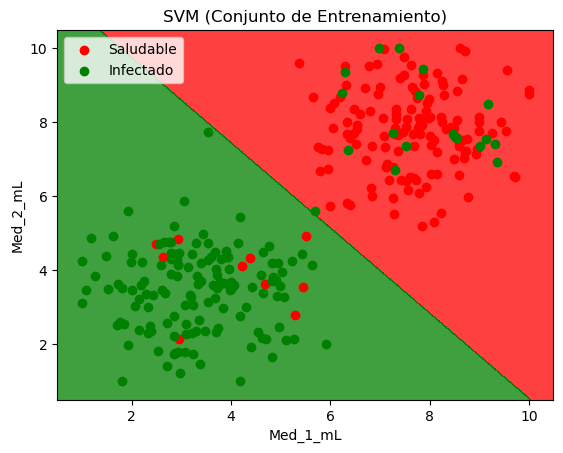

In [9]:
X_set, y_set = sc.inverse_transform(X_train), y_train  # Inversa para visualizar en la escala original
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 0.5, stop=X_set[:, 0].max() + 0.5, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 0.5, stop=X_set[:, 1].max() + 0.5, step=0.01))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=colors[i], label='Infectado' if j == 1 else 'Saludable')
plt.title('SVM (Conjunto de Entrenamiento)')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.legend()
plt.show()

## Sobre el Conjunto de Prueba

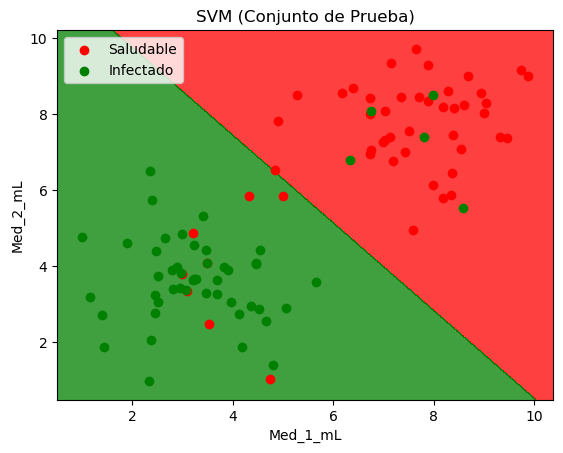

In [10]:
X_set, y_set = sc.inverse_transform(X_test), y_test  # Inversa para visualizar en la escala original
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 0.5, stop=X_set[:, 0].max() + 0.5, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 0.5, stop=X_set[:, 1].max() + 0.5, step=0.01))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=colors[i], label='Infectado' if j == 1 else 'Saludable')
plt.title('SVM (Conjunto de Prueba)')
plt.xlabel('Med_1_mL')
plt.ylabel('Med_2_mL')
plt.legend()
plt.show()

# ANÁLISIS

# Matriz de Confusión

La matriz de confusión nos permite visualizar el desempeño del modelo mostrando los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
- Un buen modelo tendrá valores altos en la diagonal principal.

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[41  8]
 [ 5 46]]


Esta matriz tiene lo siguiente:
- 41 casos clasificados correctamente como negativos (ratones que están saludables y el modelo acertó).
- 46 casos clasificados correctamente como positivos (ratones que están infectados y el modelo acertó).
- 13 errores, ya sea falsos positivos o falsos negativos. <br>
Por lo tanto, se puede decir que **_el modelo tiene un buen rendimiento general_**, debido a que comete pocos errores del total de 100 datos, en el que solo 13 clasificaciones no fueron acertadas.

# Accuracy

Mide el porcentaje de predicciones correctas del modelo sobre el total de los casos. Mientras más cercano a 1 (o 100%), mejor es el desempeño del modelo en general.

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión Global (Accuracy): {accuracy:.4f}")

Precisión Global (Accuracy): 0.8700


Se concluye que el modelo acierta en el **_87%_** de los casos, lo que indica que **_el modelo realiza predicciones confiables_**.

# Precision

Otorga un resultado en el que indica la proporción de verdaderos positivos entre todos los positivos predichos. En otras palabras, calcula, de todas las veces que el modelo dio un resultado positivo, ¿Cuántas veces acertó?<br>
Su interpretación se realiza de la siguiente manera:
- **Precision alta (> 0.7):** El modelo tiene un _**bajo número de falsos positivos**_. Es decir, cuando predice que algo es positivo, generalmente tiene razón.
- **Precision baja (< 0.5):** El modelo está haciendo _**muchos falsos positivos**_. En estos casos, el modelo tiende a etiquetar incorrectamente como positivos muchos ejemplos negativos, lo que puede ser un problema si la consecuencia de un falso positivo es costosa, como los casos de arrestar a una persona inocente o diagnosticar erróneamente una enfermedad.

In [13]:
precision = precision_score(y_test, y_pred)
print(f"Precisión (Precision): {precision:.4f}")

Precisión (Precision): 0.8519


El modelo _**predijo como infectado correctamente al 85,19% de los casos que realmente estaban infectados**_.

# Recall (Sensibilidad)

Métrica que indica, de todos los resultados que sí eran positivos, ¿Cuántos se detectaron?<br>
Su interpretación es la siguiente:
- **Recall alto (> 0.7):** El modelo es _**bueno para detectar casos positivos**_. Es decir, tiene una baja tasa de falsos negativos, lo que es crucial cuando un falso negativo es muy costoso.
- **Recall bajo (< 0.5):** El modelo está _**pasando por alto muchos casos positivos**_, lo cual puede ser peligroso en contextos donde no detectar algo realmente importante podría tener consecuencias graves, como no detectar una enfermedad o no detectar un fraude.

In [14]:
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensibilidad): {recall:.4f}")

Recall (Sensibilidad): 0.9020


Luego de ejecutar este cálculo, se obtuvo que _**el modelo detectó correctamente al 90.20% de los casos reales de ratones infectados**_.

# F1 Score

Es un promedio armónico entre _Precision_ y _Recall_ con el objetivo de balancear ambas métricas.<br>
Su evaluación se realiza así:
- **F1-Score alto (> 0.7):** El modelo tiene un buen balance entre precision y recall. Es ideal en situaciones donde quieres equilibrar ambas métricas y no quieres que el modelo se incline demasiado hacia un lado (precision o recall).
- **F1-Score bajo (< 0.5):** Esto indica que el modelo tiene un equilibrio pobre entre precision y recall, lo que generalmente significa que está fallando en al menos una de las dos métricas. Esto es un indicio de que el modelo no está funcionando bien en general.

In [15]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.8762


A nivel global en el modelo, este tiene un rendimiento del _**87,62%**_, lo que indica un _**buen equilibrio entre precisión y sensibilidad las métricas de precisión y recall**_.

# Área bajo la Curva ROC (AUC)

Por otro lado, la Área bajo la curva ROC (_AUC_) resume la ROC (una gráfica que muestra cómo cambia el modelo si se ajusta el umbral de clasificación, teniendo al eje X como la Tasa de Falsos Positivos o FPR, y al eje Y como la Tasa de Verdaderos Positivos o TPR) con un número entre 0 y 1. Mientras más cercano a 1, mejor el modelo distingue entre las clases. <br>
Se interpreta de la siguiente forma:
- **AUC alto (> 0.8):** El modelo tiene una excelente capacidad para separar las clases. Cuanto más cerca de 1, mejor.
- **AUC cercano a 0.5:** El modelo es prácticamente aleatorio y no tiene capacidad de discriminación.
- **AUC bajo (< 0.6):** El modelo tiene una muy baja capacidad de discriminación y probablemente no sea útil.

In [16]:
y_prob = classifier.decision_function(X_test)
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")

AUC: 0.8908


El cálculo de esta métrica nos indica que, a nivel estadístico, _**el modelo tiene una buena capacidad de clasificar correctamente una muestra aleatoria**_, pues tiene una probabilidad del _**89,08%**_ para esto.

# Porcentaje de Vectores de Soporte

Es la proporción de muestras que el modelo usa como vectores de soporte, y se evalúa de la siguiente manera:
- Los modelos con menos vectores de soporte tienden a generalizar mejor, es decir, a hacer predicciones precisas sobre datos nuevos y no vistos. Esto también implica que la frontera de decisión es más simple y está bien definida, lo que ayuda a evitar el sobreajuste.

In [17]:
n_support_vectors = classifier.n_support_.sum()
n_samples = len(X_train)
support_percentage = (n_support_vectors / n_samples) * 100
print(f"Porcentaje de vectores de soporte: {support_percentage:.2f}%")

Porcentaje de vectores de soporte: 29.33%


Tras obtener los vectores de soporte, se evidencia que el _**29.33% de los datos de entrenamiento están siendo usados como vectores de soporte**_, lo cual es un valor razonable, pues un porcentaje alto implica que hay muchos de estos vectores, indicando que el modelo depende mucho de estos y que se está adaptando demasiado a los datos de entrenamiento, lo cual significa que tiene sobreajuste u _Overfitting_.

# CONCLUSIONES

En conclusión, del dataset se estableció al volúmen de las dos medicinas suministradas a los ratones como variables independientes, pues no tienen correlación la una con la otra en cuanto a clasificación y predicciones, y luego se eligió al valor que indicaba si los ratones persistían con la infección o no como variable dependiente, pues depende directamente de los medicamentos que se les administre a los sujetos de experimentación. Después de esto, tras analizar las diferentes métricas para evaluar el modelo, se obtuvieron los siguientes resultados:
- El modelo _**comete pocos errores de clasificación errónea**_ (Falsos Positivos y Falsos Negativos), ya que la Matriz de Confusión indica que, de las 87 clasificaciones de casos, solo 13 fueron incorrectas. Esto, a su vez, se apoya con el cálculo del **Accuracy** o **Precisión Global** del modelo, la cual tiene también un valor de _**87% de aciertos**_.
- Gracias a la métrica del F1-Score, que contiene un valor de _**87,62%**_ podemos concluir que _**existe un balance entre la Precisión y Sensibilidad (Recall) del modelo**_, ya que estas tienen un valor que ronda entre el 85% y 90%, indicando una baja tasa de falsos negativos o ratones que fueron clasificados como _no infectados_ pero que sí estaban infectados, aspecto crucial en la evaluación de casos de detección de enfermedades. Esto vuelve al F1-Score una _métrica ideal en la clasificación médica_.
- El modelo tiene una probabilidad del _**90,08%**_ de clasificar correctamente una muestra aleatoria, gracias a la métrica del Área bajo la Curva ROC, la cual indica una **buena capacidad discriminativa**.
- Ya que el modelo utiliza un _**porcentaje bajo de vectores de soporte (29.33%)**_, se puede decir que este _no depende mucho de ellos_, estableciendo que es **bueno para generalizar o clasificar correctamente nuevos datos**, evitando así la presencia de Overfitting en este modelo.